In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# the below functions just generate a random di-graph with a given number of nodes and edges. 

edge-0: (1, 2)
edge-1: (4, 0)
edge-2: (0, 3)
edge-3: (2, 4)
edge-4: (4, 3)
[0, 1, 2, 3, 4]


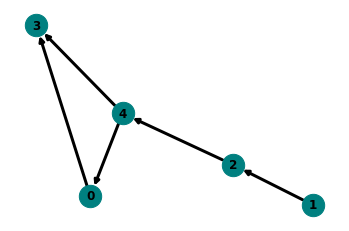

In [82]:


def generateEdges(N, E):
    # get a randomized list of edges
    RNGedges = np.random.choice(range(N), N, replace=False)
    edges = []

    
    # each edge based on the number given
#     for e in range(E):
    while(len(edges) < E):
        # pick a random node (tail)
        tn = int(np.random.choice(range(N), 1, replace=False))
        
        # pick a random node for the head and make sure we don't make loops
        hn = int(tn)
        while hn == tn:
            tn = int(np.random.choice(range(N), 1, replace=False))
        # now add this edge to the edge list
        if (tn, hn) not in edges:
            edges.append((tn, hn))

    
    return edges
        


N = 5
E = 5
edges = generateEdges(N, E)
nodes = list(range(N))
for i,e in enumerate(edges):
    print(f"edge-{i}: {e}")
    
print(nodes)

toyG = nx.DiGraph()
generateGraph(toyG, nodes, edges)

showGraph(toyG, 111, options)

# The below section creates the forward and reverse start algorithms

In [83]:
def forwardStarG(N, edges, **kwargs):
    pointers = np.full(N, np.nan)
    count = []
    c = 0
    # create sorted list of edges by the tails
    edges_sorted = sorted(edges, key=lambda x: x[0])
    node = np.inf    # initial node with place holder value
    
    # for every edge in the list 
    # go through and look for the tail node to change
    # when found store the current incrment value which represents
    # the index into the edge list where a new nodes edges begin
    for index, edge in enumerate(edges_sorted):
        # when the tail node changes 
        # store the index where the new nodes edges start
        if edge[0] != node:
            node = edge[0]
#             if len(pointers) > 0:
#                 count.append(index+1 - pointers[-1])
#             else:
#                 count.append(index+1)
#             pointers.append(index)
            pointers[node] = int(index)
           
        
    
    return edges_sorted, list(pointers), count


def reverseStarG(N, edges, **kwargs):
    print(N)
    pointers = np.full(N, np.nan)
    count = []
    c = 0
    # create sorted list of edges by the heads
    edges_sorted = sorted(edges, key=lambda x: x[1])
    index = 0   
    node = np.inf    # initial node
    # for every edge in the list 
    # go through and look for the head node to change
    # when found store the current increment value which represents
    # the index into the edge list where a new nodes edges begin
    for index, edge in enumerate(edges_sorted):
        c += 1
        # when the tail node changes 
        # store the index where the new nodes edges start
        print(f"edge_head{edge[1]}")
        if edge[1] != node:
            node = edge[1]
#            print(f"Node: {node}")
#             if len(pointers) > 0:
#                 print(f"index: {index}, pointers: {pointers[-1]}")
#                 count.append(index - pointers[-1])
#             else:
#                 count.append(index+1)
#             pointers.append(index)
            pointers[node] = index
            
            c = 0
    return edges_sorted, pointers, count

def getIndex(pointers, node):
    return pointers[node]
def getNodeDegree(pointers, count, node):
    return count[node]

edges_sorted, pointers, count = forwardStarG(N, edges)
print("forward star:")
print("|   0  |   1   |   2   |   3   |")
print(edges_sorted)
print(pointers)
print(count)

edges_sorted, pointers, count = reverseStarG(N, edges)
print("\nreverse star:")
print("|   0  |   1   |   2   |   3   |")
print(edges_sorted)
print(pointers)
print(count)





forward star:
|   0  |   1   |   2   |   3   |
[(0, 3), (1, 2), (2, 4), (4, 0), (4, 3)]
[0.0, 1.0, 2.0, nan, 3.0]
[]
5
edge_head0
Node: 0
edge_head2
Node: 2
edge_head3
Node: 3
edge_head3
edge_head4
Node: 4

reverse star:
|   0  |   1   |   2   |   3   |
[(4, 0), (1, 2), (0, 3), (4, 3), (2, 4)]
[ 0. nan  1.  2.  4.]
[]


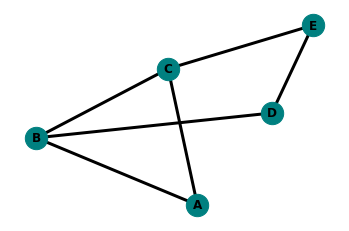

In [9]:


# Create Empty Graph
G = nx.Graph()
    
nodes = [
    ("A", {"color":"red"}),
    ("B",{"color":"blue"}),
    ("C", {"color":"green"}),
    ("D", {"color":"yello"}),
    ("E", {"color":"purple"}),
]


edges = [
    ("A", "B", {"weight": 1}),
    ("A", "C", {"weight": 2}),
    ("B", "C", {"weight": 2}),
    ("B", "D", {"weight": 1}),
    ("D", "E", {"weight": 3}),
    ("C", "E", {"weight": 4}),
]

options = {
    'node_color': 'teal',
    'node_size': 500,
    'width': 3,
    'with_labels':True, 
    'font_weight':"bold"
}
G.add_nodes_from(nodes)
G.add_edges_from(edges)

showGraph(G, 111, options)

In [ ]:
class QuizMaster:
    def __init__(self, QuizType='random', QuizFile=None, QuizDict=None,  **kwargs):
        self.quizDict = QuizDict
        self.quizFile=QuizFile
        self.quizType=QuizType
        self.quizDict_term_def={}
        self.quizDict_def_term={}
        if self.quizDict is not None:
            self.processQuizFile()
        elif self.quizFile is not None:
            self.processQuizFile()
        else:
            raise Exception("I must be given either a datafile or a dictionary of terms!!!")
        
    def processQuizFile(self, ):
        self.quizDF = pd.read_excel(self.quizFile)
        for term, defn in zip(self.quizDF["terms"], self.quizDF["definitions"]):
            self.quizDict_term_def[term] = defn
            self.quizDict_def_term[defn] = term
            
    def processQuizFile(self, ):
        terms = list(self.quizDict.keys())
        defns = list(self.quizDict.values())
        self.quizDict_term_def = self.quizDict
        self.quizDict_def_term = {t:d for t,d in zip(terms, defns)}
        
    def runQuiz(self, Qnum=None):
        if Qnum is None:
            Qnum = len(self.quizDict)
        # get random listing of terms
        rterms = np.random.choice(list(self.quizDict.keys()), len(self.quizDict.keys()), replace=False)
        count = 1
        scoresDict = {"correct": 0, "incorrect":0}
        wrong = {}
        right = {}
        broken = False
#         print(f"rterms: {rterms}")
        for term in rterms:
            if broken:
                print("Broken")
                break
            print(f"Question {count}: Select the correct defintion from the selections below of '{term}'...")
            # get the real definition and two other random ones
            real = self.quizDict[term]
            subterms = list(rterms)
            del subterms[subterms.index(term)]
#             print(f"Subterms: {subterms}")
            rands = np.random.choice(subterms, 2, replace=False)
#             print(f"Rands: {rands}")
            opts = np.random.choice([term] + list(rands), 3, replace=False)  # randomize list of possible answers
#             print(f"Opts: {opts}")
            # get the definitions for these so we can show them below
            sels = ["A", "B", "C"]
            
            toshow = {s:self.quizDict[o] for s, o in zip(sels, opts)}
#             print("Choose the correct letter selection from the choices given...")
            notSelected = True
            while notSelected:
                for option in toshow:
                    print(f"{option}: {toshow[option]}")
                ans = input(": ").upper()
                notSelected = False
                if ans in ["Q", "QUIT", "STOP", "S"]:
                    break
                    broken = True
                if ans not in sels:
                    print(f"Selection must be from {sels}")
                    notSelected = True
                elif toshow[ans] == self.quizDict[term]:
                    print("\t\t\tCorrect!!")
                    scoresDict["correct"] += 1
                    right[term] = self.quizDict[term]
                else:
                    print("\t\t\tIncorrect!!!")
                    scoresDict["incorrect"] += 1
                    wrong[term] = self.quizDict[term]
                    print(f"\t\t{term}: {wrong[term]}")
            print("\n\nNext Question: \n\n")
            count += 1
            if count > Qnum:
                break
        print("Final Score:")
        for s in scoresDict:
            print(f"\t\t{s}: {scoresDict[s]}")
            
        print(f'\t\t{(scoresDict["correct"]/(scoresDict["incorrect"] + scoresDict["correct"]))*100:.2f}%')
        
        if len(wrong) > 0:
            print("\n\n\t\tThe correct answers for the one you got wrong..")
        for w in wrong:
            print(f"{w}: {wrong[w]}")
                

# To Dos:

* make different graph storage architectures based on
    * Arc Adjacency lists  (Only need a dict with lists as values storing the arcs)
    * node Adjacency Lists (Adjaceny Matrix)

In [ ]:
DefinitionsDict = {
    "Graph":"collection of nodes (N) and edges (A(arcs)/E(edges))",
    "Arc":"directed connection between nodes",
    "Edge":"undirected connection between nodes",
    "indegree":"number of arcs going into a node",
    "outdegree":"number of arcs going out of a node",
    "degree":"the number of arcs/edges going into and out of a node i.e. the sum of in and out degrees",
    "head":"destination node for an arc",
    "tail":"starting node for an arc",
    "Multi-arc": "arcs that share the same source (tail) node",
    "Loops": "arcs/edges where the start and end points are the same node",
    "Subgraph": "A subset of the nodes and edges for some graph G",
    "Induced Subgraph Graph": " A subgraph where all edges between included nodes are present",
    "Spanning Subgraph": "subgraph that includes all nodes in original graph",
    "shortest path problem": "What is the best way to traverse a network to get from one point to another as cheaply as possible?",
    "Maximum flow problem":"If a network has capacities on arc flows, how can we send as much flow as possible between two points in the network while honoring the arc flow capacities?",
    "Minimum cost flow problem.":"If we incur a cost per unit flow on a network with arc capacities and we need to send units of a good that reside at one or more points in the network to one or more other points, how can we send the material at minimum possible cost? ",
    "Walk":"subgraph of G consisting of a sequence of nodes and arcs",
    "Arc Adjacency List": "set of arcs emanating from that node",
    "Node Adjacency List": "set of Nodes that share edges/arcs with a given node",
    "walk": "subgraph of G consisting of a sequence of nodes and arcs",
    "directed walk": "it is possible to walk along the sequence of arcs and nodes",
    "path": "a walk that does not visit any node more than once",
    "directed path":"a directed walk that does not visit any node more than once (no back arcs)",
    "cycle": "a path in which the start node is the same as the finish node",
    "directed cycle": "a directed path in which the start node is the same as the finish node",
#     "acyclic graph":"G with no directed cycles",
#     "connected nodes":"nodes that have some >= 1 path between them",
#     "strongly connected nodes":"nodes that have some >= 1 **directed** path between them",
#     "disconnected G":"not all node pairs have path between them",
#     "connected G":"all node pairs have path between them",
#     "Strongly connected G":"every node pair has at least 1 directed path between them",
#     "cut":"a partitioning of N into S and S' disjoint sets",
#     "s-t cut":" a cut nodes s and t end up in different sets",
#     "tree":"directed graph with no cycle",
#     "tree on n nodes contains exactly how many edges?":"n-1",
#     "leaf node":"node in tree G with degree 1",
#     "a tree has at least how many leaf nodes":"2",
#     "every node in a tree has":"a unique path between them",
#     "forest":"a collection of tree graphs",
#     "subtree":"connected subgraph of a tree",
#     "rooted tree":"tree where a root node at the top and the other nodes haveing sequential nodes downward",
#     "parent node":"upper node in a rooted three with a child node below it sharing an edge",
#     "child node":"node in a rooted tree with a parent node above it sharing an edge",
#     "has no parent node":"root node",
#     "has no children":"leaf node",
#     "out tree":"directed rooted tree with all edges going away from the root",
#     "in tree":"directed rooted tree with all edges going toward the root",
#     "spanning tree":"subtree that includes all original nodes",
#     "tree arcs":"arcs in a spanning tree",
#     "non-tree arcs":"arcs not in the spanning tree",
#     "fundamental cycle":"cycle created in spanning tree by adding a non-tree arc back",
#     "fundamental cut":"a cut done on a spanning tree",
#     "bi-partite G":"can partition nodes into two sets where all edges go from one set to the other",
#     "A bi-partite G has how many odd cycles":"none",
#     "":"",
#     "":"",
#     "":"",
#     "":"",
#     "":"",
#     "":"",
#     "":"",
#     "":"",
}

DefinitionsQ = {
    "Graph":"collection of nodes (N) and edges (A(arcs)/E(edges))",
    "Arc":"directed connection between nodes",
    "Edge":"undirected connection between nodes",
}


# QM = QuizMaster(QuizDict=DefinitionsQ)
QM = QuizMaster(QuizDict=DefinitionsDict)

In [ ]:
Qnum=None
QM.runQuiz(Qnum=Qnum)

In [ ]:
import pandas as pd

In [ ]:
def GraphStructurs:
    def __init__(self, N: list, E: list or dict, **kwargs):
        self.N = N
        self.E = E
        self.kwargs = kwargs
        self.adjacencyMat = np.zeros(N, N)


class GQgraphs:
    def __init__(self, N: list, E: list or dict, **kwargs):
        self.N = N
        self.E = E
        self.kwargs = kwargs
        
        self.G = pd.DataFrame( columns=N, index=N)
        self.Gpath = pd.DataFrame( columns=N, index=N)
        for edge in E:
            self.G.loc[edge[0], edge[1]] = E[edge]
        display(self.G)
        for i in E:
            for j in E:
                print(f"i: {i}, J: {j}")
                if self.G.loc[i, j].to_numpy()[0] is np.nan:
                    print("Found NAN")
                else:
                    print(f"Found: {self.G.loc[i, j].to_numpy()[0]}")
        
gqG = GQgraphs(["A", "B", "C"], {("A", "B"): 5, ("B", "C"): 6})   
        
        